In [2]:
#SQL TEST

import sqlite3
from sqlite3 import OperationalError

In [3]:
conn = sqlite3.connect('Test.db')

In [4]:
c = conn.cursor()

In [602]:
#Show all Tables in the DB

import pandas as pd
table = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(table)

         name
0       Album
1       genre
2        Song
3  Song_Album
4      Artist
5      Charts


In [601]:
c.execute("drop table if exists Song2")

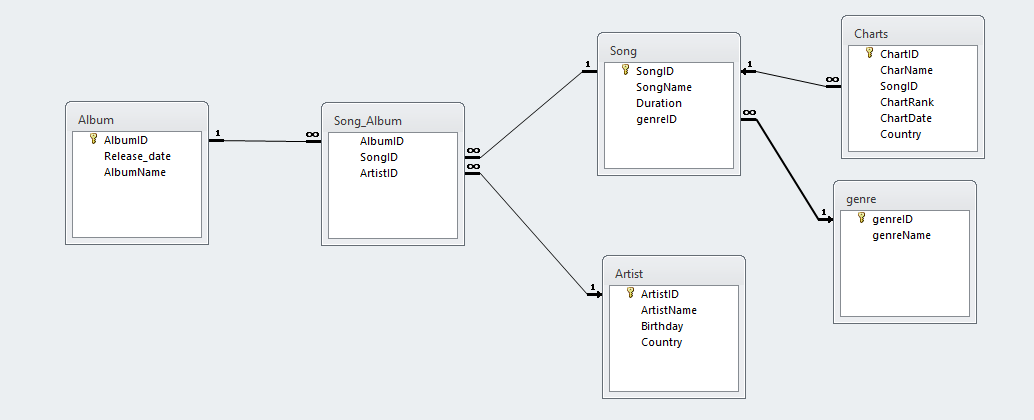

In [25]:
#Database schema and relationships

from IPython.display import Image
Image(filename='/Users/husseinabualim/Downloads/SQL_test_schema.png')

In [34]:
#Create Master Table Album
Album = '''CREATE TABLE Album
(
 AlbumID VARCHAR2(10) PRIMARY KEY NOT NULL UNIQUE,
 Release_date DATE,
 AlbumName VARCHAR2(8)
);'''

In [35]:
#Exicut the create tbl variable
c.execute(Album)

In [43]:
#Create Table Album

genre = '''CREATE TABLE genre
(
 genreID VARCHAR2(10) PRIMARY KEY NOT NULL UNIQUE,
 genreName VARCHAR2(10)
);'''

In [476]:
#Create Table Charts

Charts = '''CREATE TABLE Charts
(
 ChartID VARCHAR2(10) PRIMARY KEY,
 ChartName VARCHAR2(20),
 SongID VARCHAR2(10),
 ChartRank Number(10),
 ChartDate Date,
 Country VarChar2(20),
 FOREIGN KEY (SongID) REFERENCES Song(SongID)
);'''

In [477]:
#Exicut the create tbl variable
c.execute(Charts)

In [66]:
#Create Table Song

Song = '''CREATE TABLE Song
(
 SongID VARCHAR2(10) PRIMARY KEY NOT NULL UNIQUE,
 SongName VARCHAR2(20),
 Duration Number(10), 
 genreID VARCHAR2(10),
 FOREIGN KEY (genreID) REFERENCES genre(genreID)
);'''

In [67]:
#Exicut the create tbl variable
c.execute(Song)

In [222]:
#Create Table Song_Album

Song_Album = '''CREATE TABLE Song_Album
(
 AlbumID Number(10),
 SongID VARCHAR2(10),
 ArtistID VARCHAR2(10),
 FOREIGN KEY (AlbumID) REFERENCES Album(AlbumID),
 FOREIGN KEY (SongID) REFERENCES Song(SongID),
 FOREIGN KEY (ArtistID) REFERENCES Artist(ArtistID)
);'''

In [370]:
#Exicut the create tbl variable
c.execute(Song_Album)

In [339]:
#Create Table Artist

Artist = '''CREATE TABLE Artist
(
 ArtistID VARCHAR2(10) PRIMARY KEY NOT NULL UNIQUE,
 ArtistName VARCHAR2(20),
 Birthday DATE,
 Country VARCHAR2(20)
);'''

In [340]:
#Exicut the create tbl variable
c.execute(Artist)

genre -> Song -> Charts -> Artist -> SongAlbum

In [73]:
#"INSERT INTO genre(genreID, genreName) VALUES(1, 'Rock');"

In [76]:
c.execute("INSERT INTO genre(genreID, genreName) VALUES(1, 'Rock');")

In [88]:
#genres list
genres = (("Love", 2), ("Blues", 3), ("Jazz", 4), ("Techno", 5),("Alternative Rock", 6),("Metal Rock", 7),("Hard Rock", 8),("Rock-n-Roll", 9))

In [92]:
#Insert many into genre table
c.executemany('INSERT INTO genre (genreName, genreID) VALUES (?, ?)', genres)

In [93]:
#Define fetch function to make querying the tables easier

def Query_All_Table(c, table):
    c.execute("SELECT * FROM"+' '+str(table))

    rows = c.fetchall()

    for row in rows:
        print(row)

In [94]:
Query_Table(c,'genre')

('1', 'Rock')
('2', 'Love')
('3', 'Blues')
('4', 'Jazz')
('5', 'Techno')
('6', 'Alternative Rock')
('7', 'Metal Rock')
('8', 'Hard Rock')
('9', 'Rock-n-Roll')


In [95]:
#Song Table
Song = ((111,"kill", 3,1), (222,"Love me", 4, 2), (333, "by myself", 3,1), (444, "Anna", 2,3), (555, "We are the champions", 5,1), 
          (666, "Enter into Hell", 6,1), (777, "No woman No cry", 2,2), (888, "Cry Me A river", 3,3), 
          (999, "Dance to the Rythem", 4,5))

Song2 = ((112,"Away from the Sun", 5,6), (221,"Breath", 4, 7), (331, "Deep", 3,8), (441, "Shake it", 2,9))
Song3 = ((113,"Sun Shine", 2,6), (223,"Breath unto you", 5, 7), (334, "Death", 3,8), (445, "bottoms up", 3,9))
Song4 = ((551,"Aicha", 4,2), (661,"Je Taime", 4, 2), (771, "La Mer", 3,10), (881, "Papaoutai", 2,10))


In [375]:
#Insert many into song table
c.executemany('INSERT INTO Song (SongID, SongName,Duration,genreID) VALUES (?,?,?,?)', Song)

In [439]:
Query_Table(c,'Song')

('111', 'kill', 3, '1')
('222', 'Love me', 4, '2')
('333', 'by myself', 3, '1')
('444', 'Anna', 2, '3')
('555', 'We are the champions', 5, '1')
('666', 'Enter into Hell', 6, '1')
('777', 'No woman No cry', 2, '2')
('888', 'Cry Me A river', 3, '3')
('999', 'Dance to the Rythem', 4, '5')
('112', 'Away from the Sun', 5, '6')
('221', 'Breath', 4, '7')
('331', 'Deep', 3, '8')
('441', 'Shake it', 2, '9')
('113', 'Sun Shine', 2, '6')
('223', 'Breath unto you', 5, '7')
('334', 'Death', 3, '8')
('445', 'bottoms up', 3, '9')
('551', 'Aicha', 4, '2')
('661', 'Je Taime', 4, '2')
('771', 'La Mer', 3, '10')
('881', 'Papaoutai', 2, '10')
('991', 'Allez Le Bleu', 4, '10')


In [119]:
#Test Query

c.execute("SELECT * FROM Song S inner join genre G on S.genreID = G.genreID")

rows = c.fetchall()

for row in rows:
    print(row)

('111', 'kill', 3, '1', '1', 'Rock')
('222', 'Love me', 4, '2', '2', 'Love')
('333', 'by myself', 3, '1', '1', 'Rock')
('444', 'Anna', 2, '3', '3', 'Blues')
('555', 'We are the champions', 5, '1', '1', 'Rock')
('666', 'Enter into Hell', 6, '1', '1', 'Rock')
('777', 'No woman No cry', 2, '2', '2', 'Love')
('888', 'Cry Me A river', 3, '3', '3', 'Blues')
('999', 'Dance to the Rythem', 4, '5', '5', 'Techno')
('112', 'Away from the Sun', 5, '6', '6', 'Alternative Rock')
('221', 'Breath', 4, '7', '7', 'Metal Rock')
('331', 'Deep', 3, '8', '8', 'Hard Rock')
('441', 'Shake it', 2, '9', '9', 'Rock-n-Roll')
('113', 'Sun Shine', 2, '6', '6', 'Alternative Rock')
('223', 'Breath unto you', 5, '7', '7', 'Metal Rock')
('334', 'Death', 3, '8', '8', 'Hard Rock')
('445', 'bottoms up', 3, '9', '9', 'Rock-n-Roll')


In [120]:
#Test Query
c.execute("SELECT * FROM Song S inner join genre G on S.genreID = G.genreID where G.genreName like '%Rock%'")

rows = c.fetchall()

for row in rows:
    print(row)

('111', 'kill', 3, '1', '1', 'Rock')
('333', 'by myself', 3, '1', '1', 'Rock')
('555', 'We are the champions', 5, '1', '1', 'Rock')
('666', 'Enter into Hell', 6, '1', '1', 'Rock')
('112', 'Away from the Sun', 5, '6', '6', 'Alternative Rock')
('221', 'Breath', 4, '7', '7', 'Metal Rock')
('331', 'Deep', 3, '8', '8', 'Hard Rock')
('441', 'Shake it', 2, '9', '9', 'Rock-n-Roll')
('113', 'Sun Shine', 2, '6', '6', 'Alternative Rock')
('223', 'Breath unto you', 5, '7', '7', 'Metal Rock')
('334', 'Death', 3, '8', '8', 'Hard Rock')
('445', 'bottoms up', 3, '9', '9', 'Rock-n-Roll')


In [236]:
#Test Nested Query

c.execute("SELECT SongName, genreName FROM (SELECT * FROM Song S inner join genre G on S.genreID = G.genreID where G.genreName like '%Rock%')")

rows = c.fetchall()

for row in rows:
    print(row)

('kill', 'Rock')
('by myself', 'Rock')
('We are the champions', 'Rock')
('Enter into Hell', 'Rock')
('Away from the Sun', 'Alternative Rock')
('Breath', 'Metal Rock')
('Deep', 'Hard Rock')
('Shake it', 'Rock-n-Roll')
('Sun Shine', 'Alternative Rock')
('Breath unto you', 'Metal Rock')
('Death', 'Hard Rock')
('bottoms up', 'Rock-n-Roll')


In [226]:
#Song_Album Table insert2

Song_Album = ((1111,222, 200), (2222, 333, 300), 
             (3333,444, 400), (4444, 555, 500), (555, 888, 800)
             ,(6666, 112, 110), (7777, 221, 120), (8888, 331, 130), 
             (9999, 441, 140))

Song_Album2 = ((1112,551, 190), (2221,661 , 200), 
             (3331,771, 201), (4441, 881, 202))

In [229]:
c.execute('INSERT INTO Song_Album (AlbumID, SongID, ArtistID) VALUES(Null,111, 100)')
c.execute('INSERT INTO Song_Album (AlbumID, SongID, ArtistID) VALUES(Null,666 , 600)')
c.execute('INSERT INTO Song_Album (AlbumID, SongID, ArtistID) VALUES(Null, 999, 900)')
c.execute('INSERT INTO Song_Album (AlbumID, SongID, ArtistID) VALUES(Null,777 , 700)')
c.execute('INSERT INTO Song_Album (AlbumID, SongID, ArtistID) VALUES(Null,113 , 150)')
c.execute('INSERT INTO Song_Album (AlbumID, SongID, ArtistID) VALUES(Null,223 , 160)')
c.execute('INSERT INTO Song_Album (AlbumID, SongID, ArtistID) VALUES(Null, 334, 170)')
c.execute('INSERT INTO Song_Album (AlbumID, SongID, ArtistID) VALUES(Null, 445, 180)')
c.execute('INSERT INTO Song_Album (AlbumID, SongID, ArtistID) VALUES(Null, 991, 204)')

In [371]:
#Insert many into Song_Album table

c.executemany('INSERT INTO Song_Album (AlbumID, SongID, ArtistID) VALUES (?,?,?)', Song_Album2)

In [433]:
Query_Table(c,'Song_Album')

(1111, '222', '200')
(2222, '333', '300')
(3333, '444', '400')
(4444, '555', '500')
(555, '888', '800')
(6666, '112', '110')
(7777, '221', '120')
(8888, '331', '130')
(9999, '441', '140')
(None, '111', '100')
(None, '666', '600')
(None, '999', '900')
(None, '777', '700')
(None, '113', '150')
(None, '223', '160')
(None, '334', '170')
(None, '445', '180')
(1112, '551', '190')
(2221, '661', '200')
(3331, '771', '201')
(4441, '881', '202')


In [341]:
#Artist Table insert2

Artist = ((100,'Metalica','1964-07-04', 'United States'), (200,'Bob Marley' ,'1964-05-06' ,'Jamaica'), 
             (300,'Linkin Park', '1983-07-08','Canada'), (400,'Basta' ,'1972-07-07' ,'Russia'), (500,'Robbie Williams' ,'1966-06-06', 'United Kingdom')
             ,(600,'SlipKnot' ,'1981-01-01', 'United States'), (700, 'Bob Marley', '1964-05-06','Jamaica'), (800,'Madonna' , '1964-03-04','Israel'), 
             (900, 'Electric', '1973-08-08','Germany') ,(110,'Three Doors Down' ,'1982-06-05', 'United States'),(120,'Evenessence' ,'1992-03-03', 'France') 
             ,(130,'Zest' ,'1990-05-09', 'Poland'),(140,'Lid Zeplin' ,'1950-01-01', 'Neatherlands'),(150,'Creed' ,'1978-01-01', 'United Kingdom')
             ,(160,'Gunz&Roses' ,'1970-04-01', 'United States'),(170,'Plague' ,'2000-05-01', 'Belguim'),(180,'Nickleback' ,'1991-09-11', 'United States') 
         )

Artist2 = ((190,'Chab Khalid','1964-01-01', 'France'), (201,'Lara fabian' ,'1972-02-02' ,'France'), 
             (202,'Peter', '1981-01-01','France'), (203,'Ariel' ,'1975-01-01' ,'France'), (204,'Zidane' ,'1972-01-01' ,'France'))

In [379]:
#Insert many into Artist table

c.executemany('INSERT INTO Artist (ArtistID, ArtistName, Birthday,Country) VALUES (?,?,?,?)', Artist2)

In [470]:
Query_Table(c,'Artist')

('100', 'Metalica', '1964-07-04', 'United States')
('200', 'Bob Marley', '1964-05-06', 'Jamaica')
('300', 'Linkin Park', '1983-07-08', 'Canada')
('400', 'Basta', '1972-07-07', 'Russia')
('500', 'Robbie Williams', '1966-06-06', 'United Kingdom')
('600', 'SlipKnot', '1981-01-01', 'United States')
('700', 'Bob Marley', '1964-05-06', 'Jamaica')
('800', 'Madonna', '1964-03-04', 'Israel')
('900', 'Electric', '1973-08-08', 'Germany')
('110', 'Three Doors Down', '1982-06-05', 'United States')
('120', 'Evenessence', '1992-03-03', 'France')
('130', 'Zest', '1990-05-09', 'Poland')
('140', 'Lid Zeplin', '1950-01-01', 'Neatherlands')
('150', 'Creed', '1978-01-01', 'United Kingdom')
('160', 'Gunz&Roses', '1970-04-01', 'United States')
('170', 'Plague', '2000-05-01', 'Belguim')
('180', 'Nickleback', '1991-09-11', 'United States')
('190', 'Chab Khalid', '1964-01-01', 'France')
('201', 'Lara fabian', '1972-02-02', 'France')
('202', 'Peter', '1981-01-01', 'France')
('203', 'Ariel', '1975-01-01', 'France

In [448]:
Album = ((1111,'2020-07-07', 'Mix2020'),(2222,'2020-06-04', 'Hit2020'), (3333,'2020-08-01', 'Best2020')  , (4444,'2018-05-04', 'Hit2018') , (5555, '2017-06-04', 'AllMix17'), (6666, '1990-03-08', 'hit90s'))

In [449]:
#Insert many into song table

c.executemany('INSERT INTO Album (AlbumID, Release_date, AlbumName) VALUES (?,?,?)', Album)

In [450]:
Query_Table(c,'Album')

('1111', '2020-07-07', 'Mix2020')
('2222', '2020-06-04', 'Hit2020')
('3333', '2020-08-01', 'Best2020')
('4444', '2018-05-04', 'Hit2018')
('5555', '2017-06-04', 'AllMix17')
('6666', '1990-03-08', 'hit90s')


In [556]:
#Charts = ((11111,"MTV", 333, 1, "2000-01-01", "United States"), (22222,"Bollywood", 333, 1, "2000-01-20", "India"), 
             #(33333,"GermanBest", 333, 1, "2000-01-15", "Germany" ), (44444,"CanadaBest", 333, 1, "2000-01-15", "Canada") , (55555,"US_Top", 333, 1, "2000-01-8", "United States" ), (66666,"HollywoodTop", 333, 1, "2000-01-10", "United States"), (77777,"ParisBest", 333, 1, "2000-01-27", "France" ))

#Charts2 = ((11111,"MTV", 333, 1, "2000-01-01", "United States"), (22222,"Bollywood", 333, 1, "2000-01-20", "India"), 
             #(33333,"GermanBest", 333, 1, "2000-01-15", "Germany" ), (44444,"CanadaBest", 333, 1, "2000-01-15", "Canada") , (55555,"US_Top", 333, 1, "2000-01-8", "United States" ), (66666,"HollywoodTop", 333, 1, "2000-01-10", "United States"), (77777,"ParisBest", 333, 1, "2000-01-27", "France" ))
    
#Charts3 = ((88888,"MTV_VIP", 333, 4, "2000-01-13", "United States"), (99999,"BollywoodVIP", 333, 3, "2000-01-14", "India"), 
             #(11112,"GermanVIP", 333, 2, "2000-01-09", "Germany" ), (22221,"CanadaVIP", 333, 2, "2000-01-16", "Canada") , (33331,"US_Hot", 333, 3, "2000-01-8", "United States" ), (55551,"HollywoodVIP", 333, 4, "2000-01-118", "United States"), (66661,"ParisVIP", 333, 3, "2000-01-24", "France" ))
    
Charts4 = ((77771,"MTV_EuR", 333, 1, "2000-02-13", "United States"), (88881,"BollywoodEUR", 333, 3, "2000-02-14", "India"), 
           (99991,"GermanEuR", 333, 2, "2000-02-09", "Germany" ), (12121,"CanadaEuR", 333, 2, "2000-02-16", "Canada") , (32323,"US_EuR", 333, 3, "2000-02-8", "United States" ), (42424,"HollywoodEur", 333, 4, "2000-02-118", "United States"), (62626,"ParisEur", 333, 3, "2000-02-24", "France" ))

In [557]:
c.executemany('INSERT INTO Charts (ChartID, ChartName, SongID,ChartRank, ChartDate, Country) VALUES (?,?,?,?,?,?)', Charts4)

In [558]:
Query_Table(c,'Charts')

('11111', 'MTV', '333', 1, '2000-01-01', 'United States')
('22222', 'Bollywood', '333', 1, '2000-01-20', 'India')
('33333', 'GermanBest', '333', 1, '2000-01-15', 'Germany')
('44444', 'CanadaBest', '333', 1, '2000-01-15', 'Canada')
('55555', 'US_Top', '333', 1, '2000-01-08', 'United States')
('66666', 'HollywoodTop', '333', 1, '2000-01-10', 'United States')
('77777', 'ParisBest', '333', 1, '2000-01-27', 'France')
('88888', 'MTV_VIP', '333', 4, '2000-01-13', 'United States')
('99999', 'BollywoodVIP', '333', 3, '2000-01-14', 'India')
('11112', 'GermanVIP', '333', 2, '2000-01-09', 'Germany')
('22221', 'CanadaVIP', '333', 2, '2000-01-16', 'Canada')
('33331', 'US_Hot', '333', 3, '2000-01-8', 'United States')
('55551', 'HollywoodVIP', '333', 4, '2000-01-118', 'United States')
('66661', 'ParisVIP', '333', 3, '2000-01-24', 'France')
('77771', 'MTV_EuR', '333', 1, '2000-02-13', 'United States')
('88881', 'BollywoodEUR', '333', 3, '2000-02-14', 'India')
('99991', 'GermanEuR', '333', 2, '2000-02-0

In [444]:
#Answers

Find all songs with genre "Rock" (Rock-n-Roll, Alternative rock, Hard rock, Metal Rock) not included in any album. Display result: ArtistName, SongName, Genre.

In [344]:
c.execute("select a.ArtistName, SG.SongName, SG.genreName from (SELECT * FROM Song_Album SA inner join Song S on SA.SongID = S.SongID inner join genre G on S.genreID = G.genreID where G.genreName like '%Rock%' and SA.AlbumID is Null) as SG inner join Artist a on SG.ArtistID = a.ArtistID")

rows = c.fetchall()

for row in rows:
    print(row)

('Metalica', 'kill', 'Rock')
('SlipKnot', 'Enter into Hell', 'Rock')
('Creed', 'Sun Shine', 'Alternative Rock')
('Gunz&Roses', 'Breath unto you', 'Metal Rock')
('Plague', 'Death', 'Hard Rock')
('Nickleback', 'bottoms up', 'Rock-n-Roll')


Find the longest song by artists from France.If there are several such songs, display only the song of the youngest artist. Display result: artist name, song title, song duration.

In [441]:
c.execute("select fr.ArtistName, fr.age, fr.duration from (select a.ArtistName, SG.SongName, a.Country, (date() - a.Birthday) as age, SG.duration from (SELECT * FROM Song_Album SA inner join Song S on SA.SongID = S.SongID) as SG inner join Artist a on SG.ArtistID = a.ArtistID where a.Country is 'France') as fr" )

rows = c.fetchall()

for row in rows:
    print(row)

('Evenessence', 28, 4)
('Chab Khalid', 56, 4)
('Lara fabian', 48, 3)
('Peter', 39, 2)
('Zidane', 48, 4)


In [440]:
c.execute("With tbl AS (select fr.ArtistName, fr.SongName, fr.age, fr.duration from (select a.ArtistName, SG.SongName, a.Country, (date() - a.Birthday) as age, SG.duration from (SELECT * FROM Song_Album SA inner join Song S on SA.SongID = S.SongID) as SG inner join Artist a on SG.ArtistID = a.ArtistID where a.Country is 'France') as fr) select ArtistName, SongName, duration from tbl group by ArtistName having duration = (select max(duration) from tbl) and age = (select min(age) from tbl)")

rows = c.fetchall()

for row in rows:
    print(row)

('Evenessence', 'Breath', 4)


Find all albums are released for last 3 months. Display result: AlbumName, ArtistName, Count of Songs, Album duration.


In [483]:
c.execute("Select * from Album where Release_date >=date('now', '-90 days')")

rows = c.fetchall()

for row in rows:
    print(row)

('1111', '2020-07-07', 'Mix2020')
('2222', '2020-06-04', 'Hit2020')
('3333', '2020-08-01', 'Best2020')


Find all artists which more than 3 times place in TOP-5 chart in foreign country in one month. display result: Artist Name, artist country, month, top result in chart.

In [587]:
c.execute("With tbl AS (SELECT a.ArtistName, a.ArtistID, a.Country as artist_country, C.Country as chart_country, C.ChartRank, C.ChartDate, strftime('%m', ChartDate) as chart_month, strftime('%Y', ChartDate) as chart_year FROM Artist a inner join Song_Album SA on a.ArtistID = SA.ArtistID inner join Song S on SA.SongID = S.SongID inner join Charts C on S.SongID = C.SongID where a.country != C.country and C.ChartRank  between 1 and 5) select ArtistName, artist_country, chart_month, Top_Rank from (select ArtistName,artist_country,  count(ArtistID) as Num_Song, chart_month, chart_year, min(ChartRank) as Top_Rank from tbl group by chart_month, chart_year having Num_Song > 3)")

rows = c.fetchall()

for row in rows:
    print(row)

('Linkin Park', 'Canada', '01', 1)
('Linkin Park', 'Canada', '02', 1)


Find all songs performed by the duet. Display result: SongName, first artist name - second artist name, album name. List the artists' names in alphabetical order. If song not included in any album, value is shown like 'undefined'

In [615]:
c.execute("select * from Song_Album")

rows = c.fetchall()

for row in rows:
    print(row)

(1111, '222', '200')
(2222, '333', '300')
(3333, '444', '400')
(4444, '555', '500')
(555, '888', '800')
(6666, '112', '110')
(7777, '221', '120')
(8888, '331', '130')
(9999, '441', '140')
(None, '111', '100')
(None, '666', '600')
(None, '999', '900')
(None, '777', '700')
(None, '113', '150')
(None, '223', '160')
(None, '334', '170')
(None, '445', '180')
(1112, '551', '190')
(2221, '661', '200')
(3331, '771', '201')
(4441, '881', '202')
(None, '991', '204')
(None, '991', '205')
(1111, '222', '206')


In [641]:
#SongName, first artist name - second artist name, album name.

c.execute("select s.SongName, sg.ArtistID,  sg.SongID, count(sg.ArtistID) as cnt_ID from Artist a inner join song_album sg on a.ArtistID = sg.ArtistID inner join Song s on sg.SongID = s.SongID group by sg.SongID having cnt_ID >=2")

rows = c.fetchall()

for row in rows:
    print(row)

('Love me', '200', '222', 2)
('Allez Le Bleu', '204', '991', 2)


In [706]:
c.execute("With tbl AS (select s.SongName, sg.ArtistID, a.ArtistName,  sg.SongID, count(sg.ArtistID) as cnt_ID from Artist a inner join song_album sg on a.ArtistID = sg.ArtistID inner join Song s on sg.SongID = s.SongID group by sg.SongID, a.ArtistID) select Distinct SongName, GROUP_CONCAT(ArtistName,' - ') over (PARTITION BY SongName ORDER BY ArtistName) as Duet from tbl where SongID in (select songID from (select songID, SongName, count(SongID) as cnt from tbl group by SongID having cnt >=2 ) group by SongName)")

rows = c.fetchall()

for row in rows:
    print(row)

('Allez Le Bleu', 'Terry Henry')
('Allez Le Bleu', 'Terry Henry - Zidane')
('Love me', 'Bob Marley')
('Love me', 'Bob Marley - Ziggy Marley')


In [810]:
c.execute("With tbl AS (select s.SongName, sg.ArtistID, a.ArtistName, sg.SongID, sg.AlbumID, count(sg.ArtistID) as cnt_ID from Artist a inner join song_album sg on a.ArtistID = sg.ArtistID inner join Song s on sg.SongID = s.SongID group by sg.SongID, a.ArtistID) select Distinct SongName, GROUP_CONCAT(ArtistName,' - ') over (PARTITION BY SongName) as Duet, (Case when AlbumName is null then 'undefined' else AlbumName end) from tbl left join album ab on tbl.AlbumID = ab.AlbumID  where SongID in (select songID from (select songID, SongName, count(SongID) as cnt from tbl group by SongID having cnt >=2)) order by artistname")

rows = c.fetchall()

for row in rows:
    print(row)

('Love me', 'Bob Marley - Ziggy Marley', 'Mix2020')
('Allez Le Bleu', 'Zidane - Terry Henry', 'undefined')


In [809]:
c.execute("With tbl AS (select s.SongName, sg.ArtistID, a.ArtistName, sg.SongID, sg.AlbumID, count(sg.ArtistID) as cnt_ID from Artist a inner join song_album sg on a.ArtistID = sg.ArtistID inner join Song s on sg.SongID = s.SongID group by sg.SongID, a.ArtistID) select Distinct SongName, GROUP_CONCAT(ArtistName,' - ') over (PARTITION BY SongName Order by artistname) as Duet, (Case when AlbumName is null then 'undefined' else AlbumName end) from tbl left join album ab on tbl.AlbumID = ab.AlbumID  where SongID in (select songID from (select songID, SongName, count(SongID) as cnt from tbl group by SongID having cnt >=2))")

rows = c.fetchall()

for row in rows:
    print(row)

('Allez Le Bleu', 'Terry Henry', 'undefined')
('Allez Le Bleu', 'Terry Henry - Zidane', 'undefined')
('Love me', 'Bob Marley', 'Mix2020')
('Love me', 'Bob Marley - Ziggy Marley', 'Mix2020')


Python data analysis Decathlon vacancy exam

In [815]:
#Python Test 
#Import some libraries

import pandas as pd
import numpy as np
import sklearn as sk
import keras


In [4]:
#/Users/husseinabualim

Pokemon_df = pd. read_csv('/Users/husseinabualim/Downloads/DS-evaluation-2020-master/pokemon.csv')
Combats_df = pd. read_csv('/Users/husseinabualim/Downloads/DS-evaluation-2020-master/combats.csv')


In [855]:
Combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [853]:
Pokemon_df.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [882]:
Combats_df.describe()

,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


In [861]:
Pokemon_df.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


(6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.

In [860]:
#the number of classes, summarize the attack and defense distributions

Pokemon_df['Legendary'].value_counts().

False    735
True      65
Name: Legendary, dtype: int64

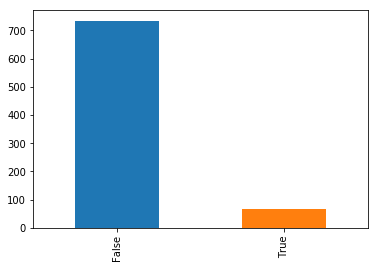

In [864]:
Pokemon_df['Legendary'].value_counts().plot('bar')

In [884]:
Pokemon_df['Class 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Class 1, dtype: int64

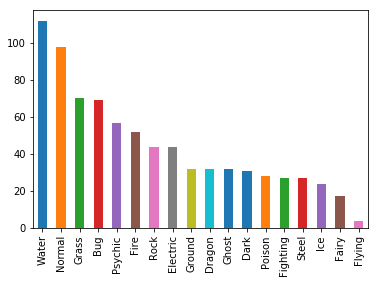

In [886]:
Pokemon_df['Class 1'].value_counts().plot('bar')

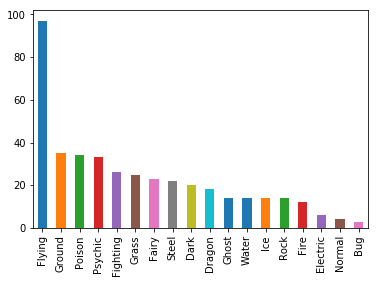

In [887]:
Pokemon_df['Class 2'].value_counts().plot('bar')

Answer: If Legendary was the class lael in our data, the variable we want to predict, we can clearly see that the catagorical variable for Legendary Pokemon is unblanaced. Imbalanced classes are a common problem in machine learning and couse overfitting and poor predictive models. Cross-validation techniques, Smote-sampling, oversampling and undersampling can help resolve this issue.

Class 1 and Class 2 are Multi-labels, instead of a [0,1] segmoid activation function like in logistic regression, we can use soft-max activiation to predict such a variable. Moreover, we can see that most of the pokemons in my data set are of flying and water types.

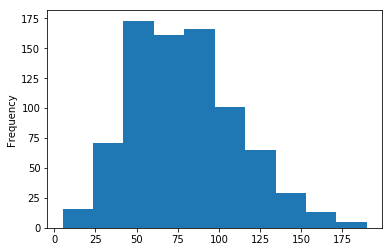

In [869]:
Pokemon_df['Attack'].plot('Hist')

In [890]:
print("Attack Mean:", Pokemon_df['Attack'].mean())
print("Attack Median:", Pokemon_df['Attack'].median())
print("Attack Mode:", Pokemon_df['Attack'].mode())
print("Attack Skewness:", Pokemon_df['Attack'].skew())
print("Attack Kurtosis:", Pokemon_df['Attack'].kurt())
print("Max Attack:",Pokemon_df['Attack'].max())
print("Min Attack:",Pokemon_df['Attack'].min())
Range = (Pokemon_df['Attack'].max() - Pokemon_df['Attack'].min())
print("Attack Range:",Range)

Attack Mean: 79.00125
Attack Median: 75.0
Attack Mode: 0    100
dtype: int64
Attack Skewness: 0.5516137480269772
Attack Kurtosis: 0.1697173149230906
Max Attack: 190
Min Attack: 5
Attack Range: 185


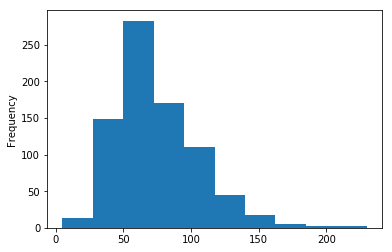

In [868]:
Pokemon_df['Defense'].plot('Hist')

In [889]:
print("Defense Mean:", Pokemon_df['Defense'].mean())
print("Defense Median:", Pokemon_df['Defense'].median())
print("Defense Mode:", Pokemon_df['Defense'].mode())
print("Defense Skewness:", Pokemon_df['Defense'].skew())
print("Defense Kurtosis:", Pokemon_df['Defense'].kurt())
print("Max Defense:",Pokemon_df['Defense'].max())
print("Min Defense:",Pokemon_df['Defense'].min())
Range = (Pokemon_df['Defense'].max() - Pokemon_df['Defense'].min())
print("Defense Range:",Range)

Defense Mean: 73.8425
Defense Median: 70.0
Defense Mode: 0    70
dtype: int64
Defense Skewness: 1.1559123029560856
Defense Kurtosis: 2.726260359939344
Max Defense: 230
Min Defense: 5
Defense Range: 225


Normal Distribution Characteristics:

#Normal Mean = Median = Mode = 0
#Normal Skewness = 0
#Normal Kurtosis = 3

Attack Distribution Analysis: The kurtosis is close to zero, less than or equal to three and above zero. This implies that the distribution is Mesokurtic, meaning that the probability of extreme, rare, or outlier data is zero or close to zero. We can see that the distribution is also positively skewed, Mean > Median > Mode. This would emply that, most values are clustered around the left tail of the distribution while the right tail of the distribution is longer, or that there are less pokemons with high attacking skills, that is the majority of the pokemon in the data set are of less attack. Low median attack, or 50% of the pokemons are below the average attack.

Defense Distribution Analysis: The kurtosis is close to three, less than or equal to three and above zero. This implies that the distribution is Mesokurtic, meaning that the probability of extreme, rare, or outlier data is zero or close to zero. We can see that the distribution is also positively skewed, not normal, Mean > Median > Mode. This would emply that there are less pokemons with high defensive skill, that is the majority of the pokemon in the data set are of less defensive skill. Low median defense, or 50% of the pokemons are below the average defense.

In [892]:
#Clustering
clust_df = Pokemon_df[['Defense','Attack']]
clust_df2 = Pokemon_df[['Defense','Attack', 'Speed']]

In [893]:
clust_df.head()

,Defense,Attack
0,49,49
1,63,62
2,83,82
3,123,100
4,43,52


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [896]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(clust_df)
    distortions.append(kmeanModel.inertia_)

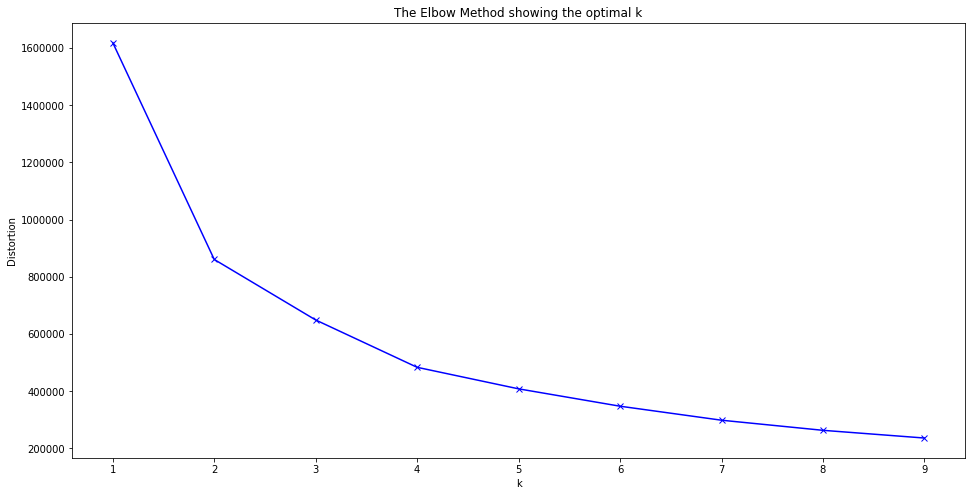

In [897]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [918]:
kmeanModel = KMeans(n_clusters=2)
y_kmeans = kmeanModel.fit(clust_df)


In [919]:
clust_df.head()

,Defense,Attack,k_means
0,49,49,0
1,63,62,0
2,83,82,1
3,123,100,1
4,43,52,0


Text(0,0.5,'Attack')

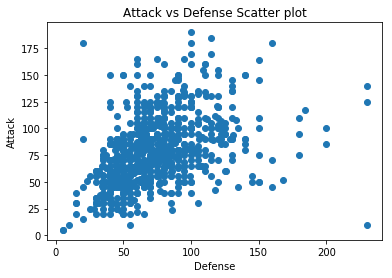

In [976]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(clust_df['Defense'], clust_df['Attack'])
ax.set_title('Attack vs Defense Scatter plot')
ax.set_xlabel('Defense')
ax.set_ylabel('Attack')

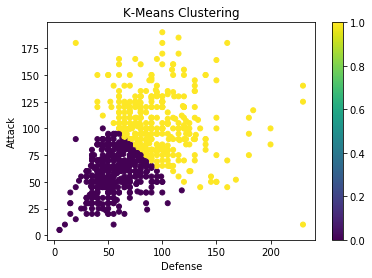

In [967]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(clust_df['Defense'],clust_df['Attack'],
                     c=clust_df['k_means'],s=25)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Defense')
ax.set_ylabel('Attack')
plt.colorbar(scatter)

2D Clustering analysis: We can see that our Pokemons are of two major types or groups. Group 1, labeled in purple is the low defenss, low attack pokemons. These are weak pokemons, and the other group, labeled in yellow is Group number 2, these are very strong pokemons with very high defensive power. We can also see one outlier, at the bottom right, which has very high defense and very low defense. This point could be a result of an error in the data, and if so we can truncat it or use an average value, mean, linear regression to predict it if it is a messing value.

In [964]:
Pokemon_df.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [968]:
Combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [1114]:
print("Pokemon_df Diminsions:", Pokemon_df.shape)
print("Combat_df Diminsions:", Combats_df.shape)

Pokemon_df Diminsions: (800, 12)
Combat_df Diminsions: (50000, 3)


In [970]:
Pokemon_df.corr()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.326715
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,1.000000


#Correlation Matrix
We can see that the variables are somewhat correlated. Attack variable with HP ,Defense and speed. Could be a problem for our modeling 
purposes in regression for example, (Multicollinearity); however, if a VIF test is conducted and the values are VIF<5, then it won't affect the model.

In [972]:
#Three Diminsional Exploration using Kmeans and adding speed variable

Questin 2: Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,
#visualize the relation between these two variables using an appropriate plot;
#list the names of the 3 Pokémon with highest attack-over-defense ratio;
#list the names of the 3 Pokémon with lowest attack-over-defense ratio;
#list the names of the 10 Pokémon with the largest number of victories.

i) I ploted the histograms for the two variables above, and explained the distributions. I ploted the scatter plot that shows positive correlation between the two variables as seen above.

In [977]:
Pokemon_df['Attack/Defense Ratio'] = Pokemon_df['Attack']/ Pokemon_df['Defense']

In [982]:
Pokemon_df.sort_values('Attack/Defense Ratio').tail(3)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Attack/Defense Ratio
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False,3.75
347,348,Carvanha,Water,Dark,45,90,20,65,20,65,False,4.50
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,True,9.00


In [983]:
Pokemon_df.sort_values('Attack/Defense Ratio').head(3)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Attack/Defense Ratio
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,False,0.043478
139,140,Magikarp,Water,NaN,20,10,55,15,20,80,False,0.181818
484,485,Bronzor,Steel,Psychic,57,24,86,24,86,23,False,0.279070


In [63]:
Num_Wins =  pd.DataFrame(Combats_df['Winner'].value_counts())

In [64]:
Num_Wins.reset_index(level=0, inplace=True)

In [65]:
Num_Wins.head()

,index,Winner
0,163,152
1,154,136
2,438,136
3,428,134
4,432,133


In [66]:
Num_Wins.columns = ['pid', 'Number_Of_Wins']

In [67]:
Num_Wins.head()

,pid,Number_Of_Wins
0,163,152
1,154,136
2,438,136
3,428,134
4,432,133


In [68]:
Pokemon_Num_wins_df = pd.merge(Pokemon_df, Num_Wins, how='inner', on='pid')

In [69]:
Pokemon_Num_wins_df.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Number_Of_Wins
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,37
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,46
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,89
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,70
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,55


In [70]:
Pokemon_Num_wins_df.sort_values('Number_Of_Wins').tail(10)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Number_Of_Wins
147,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False,127
238,249,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,False,128
205,214,Murkrow,Dark,Flying,60,85,42,85,42,91,False,130
382,394,Mega Absol,Dark,NaN,65,150,60,115,60,115,False,130
303,314,Slaking,Normal,NaN,150,160,100,95,65,100,False,133
419,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True,133
415,428,Jirachi,Steel,Psychic,100,100,100,100,100,100,True,134
425,438,Infernape,Fire,Fighting,76,104,71,104,71,108,False,136
146,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False,136
155,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,152


It is abvious above that Mewtwo has the highest wins. Mewtwo is a Psychic pokemon, he is known in the pokemon world as the rarest and strongest pokemon to have ever existed. He is a Psychic pokemon closely related to Mew. The philosophy behind Mewtwo's creation was to make the world's strongest Pokémon. 

Text(0,0.5,'Wins')

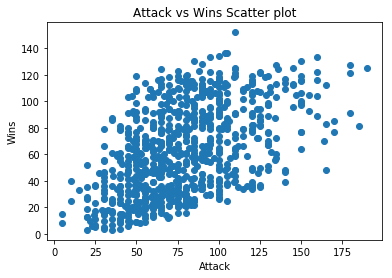

In [1009]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(Pokemon_Num_wins_df['Attack'], Pokemon_Num_wins_df['Number_Of_Wins'])
ax.set_title('Attack vs Wins Scatter plot')
ax.set_xlabel('Attack')
ax.set_ylabel('Wins')

In [1012]:
Pokemon_Num_wins_df[['Defense','Attack','Speed','Number_Of_Wins']].corr()

,Defense,Attack,Speed,Number_Of_Wins
Defense,1.000000,0.464539,0.025762,0.142628
Attack,0.464539,1.000000,0.382310,0.502255
Speed,0.025762,0.382310,1.000000,0.918536
Number_Of_Wins,0.142628,0.502255,0.918536,1.000000


We can clearly see that there is a positive correlation between a pokemons attack and the number of wins they achieve in the Pokémon Stadium

Question 3: Professor Oak suspects that Pokémon in the grass class have a stronger regular attack than those in the rock class. 

Check if he is right and convince him of your conclusion with statistical arguments. 

Note: If there are Pokémon that are in both classes, discard them. Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.

Assumptions: 

#The distribution of the regular attack feature is assumed to be normal; However, we know that in our early analysis of the distirbution it is skewed, so a non-parametric comparison of medians is to be used instead of a parametric one, comparison of means. But for the sake of this assignment we will use a parametric test to compare the two distributions.

#H0: m1 =  m2
#H1: m1 != m2

In [ ]:
Grass_Pokemon_Df =[[]]

In [ ]:
Rock_Pokemon_Df =[[]]

In [1022]:
Grass_Pokemon_Df = Pokemon_Num_wins_df.loc[Pokemon_Num_wins_df['Class 1'] == "Grass"]

In [1024]:
Rock_Pokemon_Df = Pokemon_Num_wins_df.loc[Pokemon_Num_wins_df['Class 1'] == "Rock"]

In [1036]:
#Rock of class Grass we will drop these.

Rock_Pokemon_Df.loc[Rock_Pokemon_Df['Class 2'] == "Grass"]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Attack/Defense Ratio,Number_Of_Wins
366,378,Lileep,Rock,Grass,66,41,77,61,87,23,False,0.532468,15
367,379,Cradily,Rock,Grass,86,81,97,81,107,43,False,0.835052,26


In [ ]:
#Remove Pokemons with class 2 as Rock

In [1041]:
Rock_Pokemon_Df2 = Rock_Pokemon_Df2.drop(366)

In [1042]:
Rock_Pokemon_Df2.loc[Rock_Pokemon_Df2['Class 2'] == "Grass"]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Attack/Defense Ratio,Number_Of_Wins


In [ ]:
#Descriptive stats for the two

In [1051]:
print("Attack Mean:", Rock_Pokemon_Df2['Attack'].mean())
print("Attack Median:", Rock_Pokemon_Df2['Attack'].median())
print("Attack Mode:", Rock_Pokemon_Df2['Attack'].mode())
print("Attack Skewness:", Rock_Pokemon_Df2['Attack'].skew())
print("Attack Kurtosis:", Rock_Pokemon_Df2['Attack'].kurt())
print("Max Attack:",Rock_Pokemon_Df2['Attack'].max())
print("Min Attack:",Rock_Pokemon_Df2['Attack'].min())
Range = (Rock_Pokemon_Df2['Attack'].max() - Rock_Pokemon_Df2['Attack'].min())
print("Attack Range:",Range)
print("Number of Obsv.", Rock_Pokemon_Df2['Attack'].count())

Attack Mean: 94.38095238095238
Attack Median: 95.0
Attack Mode: 0     80
1     95
2    100
3    105
dtype: int64
Attack Skewness: 0.21969033079684414
Attack Kurtosis: -0.815186942399655
Max Attack: 165
Min Attack: 40
Attack Range: 125
Number of Obsv. 42


In [1050]:
print("Attack Mean:", Grass_Pokemon_Df['Attack'].mean())
print("Attack Median:", Grass_Pokemon_Df['Attack'].median())
print("Attack Mode:", Grass_Pokemon_Df['Attack'].mode())
print("Attack Skewness:", Grass_Pokemon_Df['Attack'].skew())
print("Attack Kurtosis:", Grass_Pokemon_Df['Attack'].kurt())
print("Max Attack:",Grass_Pokemon_Df['Attack'].max())
print("Min Attack:",Grass_Pokemon_Df['Attack'].min())
Range = (Grass_Pokemon_Df['Attack'].max() - Grass_Pokemon_Df['Attack'].min())
print("Attack Range:",Range)
print("Number of Obsv.",Grass_Pokemon_Df['Attack'].count())

Attack Mean: 72.74626865671642
Attack Median: 70.0
Attack Mode: 0    100
dtype: int64
Attack Skewness: 0.1939546475656336
Attack Kurtosis: -0.6943862284351034
Max Attack: 132
Min Attack: 27
Attack Range: 105
Number of Obsv. 67


Both distributions are leptokurtic, Ku<3. skewness close to zero.

Hypothesis Testing, Is there sufficient evidence to conclude that Rock pokemon have lower attacke average? using a confidence_lvl alpha = .05.

H0: m1 – m2 = 0           Ha: m1 – m2 > 0

Decision Rule: Accept Ha if the calculated p-value < .05.

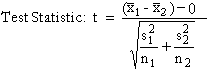

DF = (N1 - 1) + (N2 - 1) for independent samples)

In [1075]:
(np.std(Grass_Pokemon_Df['Attack']))**2 + (np.std(Rock_Pokemon_Df2['Attack']))

677.809915050981

In [1081]:
def TStat(X,Y):
    t = ((np.mean(X) -np.mean(Y))-0)/ np.sqrt((((np.std(X))**2)/np.count_nonzero(X)) + (((np.std(Y))**2)/np.count_nonzero(Y))) 
    print(t)

In [1109]:
X=[76,93,74,90,90,85,72,81,76,69,57,72,100,75,72,86,92,76,72,61,80,67]
Y=[74,65,66,85,79,82,80,76,57,67,71,55,72,75,89,81,72,88,72,64,61,74,63,76,85,72]

In [1101]:
TStat(X,Y) #Test my function.

1.7153684246409426


In [1108]:
TStat(Grass_Pokemon_Df['Attack'],Rock_Pokemon_Df2['Attack'])

-3.49321937488012


In [1112]:
df =(42-1)+(67-1)
print('Degrees of freedom:', df)

Degrees of freedom: 107


P-Value from Ptable at alpha = 0.05 and df =107

The p-value is .00034.

The result is significant at p < .05.

Calculations: t = -3.5, p-value = .00034 < .05 ---> Accept Ha

Interpretation: At the .05 level of significance I conclude that the true mean of Grass pokemon is higher than those of the Rock pokemon. Supporting the doctors assumption that they are stronger on average.

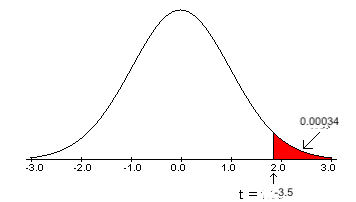

Final Question: Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use a scalable/Python method (Pyspark/dask/Python... your choice ! ). Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) map reduce implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories. Note: You don’t need to run the code -- just list it! You should assume that you have two DataFrames (already loaded) called pokemon and combats, with the same schema as the small CSV files you’ve been working with above.

Let's say I want to use hadoop cluster for this Big Data problem. I will build a mapper, to aggregated the data as a first step, and then output would go into another python code in the reduce step to do the calculations. From a Mac terminal I would run the following:

#Mapper 1 for Poke_Df

#!/usr/bin/python

import sys

#read from standard input, let's say it's a text file instead of a pandas df, with columns split by "|".

for line in sys.stdin: 
        #line = line.strip()
       # word = line.split("|") # File delemiter
        
        pid="0"
        Name="0"
        Class 1="0" 	
        Class 2 ="0"	
        HP 	="0"
        Attack ="0"	
        Defense="0" 	
        Sp. Atk="0" 	
        Sp. Def="0" 	
        Speed ="0"	
        Legendary="0"
        
        #Assigne Index to variable
        
        pid=word[0]
        Name=word[1]
        Class 1=word[2]	
        Class 2 =word[3]	
        HP 	=word[4]
        Attack =word[5]	
        Defense=word[6] 	
        Sp. Atk=word[7] 	
        Sp. Def=word[8] 	
        Speed =word[9]	
        Legendary=word[10]
        
        print"%s\t%s" %(pid, Name) #Dump name & pid
        
    

#Mapper 2 for Combat_df

for line in sys.stdin: 
        #line = line.strip()
       # word = line.split("|") # File delemiter
        
        First_pokemon="0"
        Second_pokemon="0"
        Winner="0"
        
        #Assigne Index to variable
        
        
        First_pokemon=word[0]
        Second_pokemon=word[1]
        Winner=word[2]
        
        print"%s\t%s" %(Winner) #Dump Winner ID

#Reduce

#!/usr/bin/python

import sys
import string

pid = ""
Name = ""
Winners =""

line = line.strip()
Word = line.split("\t")
    
for line in sys.stdin:
    #if len(word) == 2: # Poke have more columns than Combats
        #pid = word[0]
        #Name = word[1]
    #else:
        #winners = splits[0]
       # c=0
       # for i in pid:
            #c+=1
           # for j in winners:
               # count = winners.value_counts()   
               # if i == j:  
               #     Name = Pokemon_df['Name'][c-1]
               #     pid = i
               #     wins = count[j]
               #    print '%s\t%s' % (pid,Name,wins) #Dump name, count, month



In [80]:
#Reasoning behind Reduce 
c=0
for i in Pokemon_df['pid'].head(100):
    c+=1
    for j in Combats_df['Winner'].head(100):
        count = Combats_df['Winner'].value_counts()
        if i == j:  
            Name = Pokemon_df['Name'][c-1]
            pid = i
            wins = count[j]
            print(pid,Name,wins)

31 Pikachu 93
37 Nidoqueen 66
71 Alakazam 108
80 Tentacruel 94
95 Dewgong 68


In [ ]:
#Pyspark
#let's say data is stored on hdfs using hive tables

from pyspark.sql import *
from pyspark.sql.functions import *
hive_context = HiveContext(sc)

hive_context.sql("use Pokemon db")
sc.setLogLevel("ERROR")

data = hive_context.sql(" Select * from Pokemon")
Pokemon_Df = data.select(['pid','Name']).toDF("pid", "name")

data2 = hive_context.sql(" Select * from Combats")
Combats_Df = data.select(['Winner']).toDF("Winner")

#Once you import the data into python IDE you do the 
#same merge and value counts as the earlier question
